# Notebook pour répondre aux questions de la partie 2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df_train = pd.read_csv('../data/train.csv')

### a. Which department made the highest turnover in 2016?

In [4]:
df_train.columns

Index(['day_id', 'but_num_business_unit', 'dpt_num_department', 'turnover'], dtype='object')

In [5]:
df_train['day_id'] = pd.to_datetime(df_train['day_id'], format='%Y-%m-%d')
df_train['year'] = df_train['day_id'].dt.year
df_train['month'] = df_train['day_id'].dt.month
df_train['day'] = df_train['day_id'].dt.day

In [6]:
df_train_2016 = df_train[df_train['year'] == 2016]
df_train_2016.groupby('dpt_num_department')['turnover'].sum().idxmax()

127

It is department num 127 that made the highest turnover in 2016

<Axes: xlabel='dpt_num_department'>

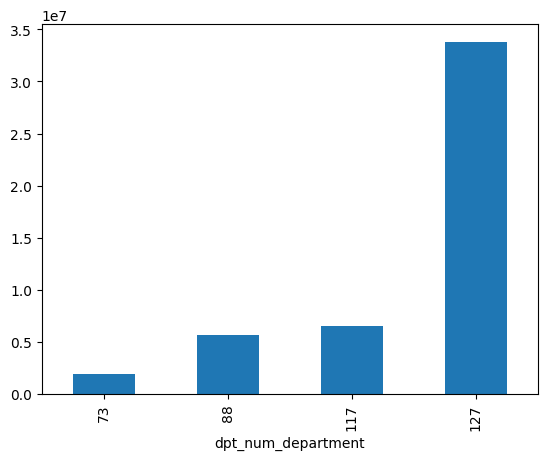

In [7]:
df_train_2016.groupby('dpt_num_department')['turnover'].sum().plot(kind='bar')

### b. What are the top 5 week numbers (1 to 53) for department 88 in 2015 in terms of turnover over all stores?

In [8]:
df_dep_88_2015 = df_train[(df_train['dpt_num_department'] == 88) & (df_train['year'] == 2015)]

In [9]:
df_dep_88_2015['week_num'] = df_dep_88_2015['day_id'].dt.isocalendar().week

/var/folders/kd/wfb_h4cs1plf9qj53qbq0g6w0000gn/T/ipykernel_18376/3104006160.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dep_88_2015['week_num'] = df_dep_88_2015['day_id'].dt.isocalendar().week


In [10]:
df_dep_88_2015[df_dep_88_2015['month']==12].day_id.value_counts()

day_id
2015-12-26    277
2015-12-19    277
2015-12-12    277
2015-12-05    277
Name: count, dtype: int64

NB pas de semaine 53 dans les data

In [11]:
df_dep_88_2015.groupby('week_num')['turnover'].sum().sort_values(ascending=False)[:5]

week_num
27    141679.864768
37    139674.400588
36    137825.642436
38    137232.460861
28    125835.541415
Name: turnover, dtype: float64

<Axes: xlabel='week_num'>

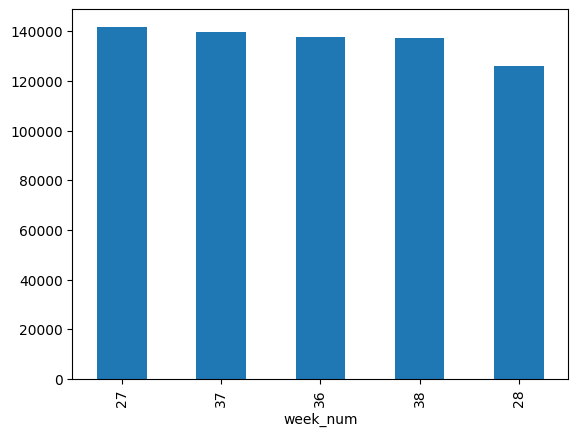

In [12]:
df_dep_88_2015.groupby('week_num')['turnover'].sum().sort_values(ascending=False)[:5].plot(kind='bar')

Les meilleurs semaines en terme de turnover du département 88 en 2016 sont les semaines 27, 37, 36, 38 et 28.  
Soit les 2 premières semaines de juillet et les 3 premières semaine de septembre (la rentrée).

### c. What was the top performer store in 2014?

In [13]:
df_2014 = df_train[df_train['year'] == 2014]

In [14]:
df_2014.groupby('but_num_business_unit')['turnover'].sum().idxmax()

121

In [15]:
df_bu_feat = pd.read_csv('../data/bu_feat.csv')

In [16]:
df_bu_feat.columns

Index(['but_num_business_unit', 'but_postcode', 'but_latitude',
       'but_longitude', 'but_region_idr_region', 'zod_idr_zone_dgr'],
      dtype='object')

In [17]:
len(df_bu_feat.but_num_business_unit.unique())

326

In [18]:
df_bu_feat[df_bu_feat['but_num_business_unit'] == 121]

,but_num_business_unit,but_postcode,but_latitude,but_longitude,but_region_idr_region,zod_idr_zone_dgr
45,121,69500,45.725769,4.9282,8,4


Après vérification sur une carte (cf notebook exploration) et des bu_features, "but_num_business_unit" semble bien être l'identification unique pour un magasin. Donc en 2014, le magasin avec la meilleure performance est le numéro 121 soit le décathlon Bron Saint Exupery au sud-est de Lyon.

### d. Based on sales can you guess what kind of sport represents departement 73?

In [19]:
df_73 = df_train[df_train['dpt_num_department'] == 73]

<Axes: xlabel='day_id'>

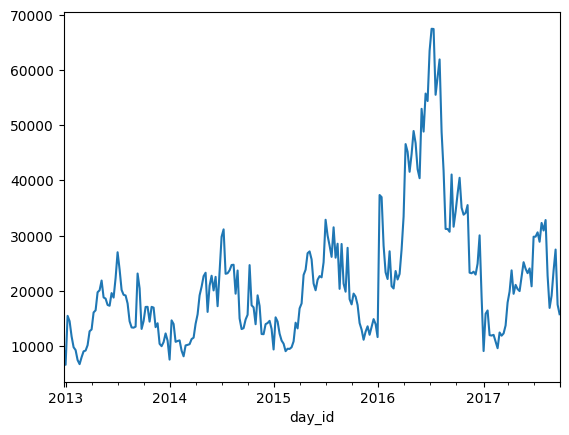

In [20]:
df_73.groupby('day_id')['turnover'].sum().plot(kind='line', x='day_id', y='turnover')

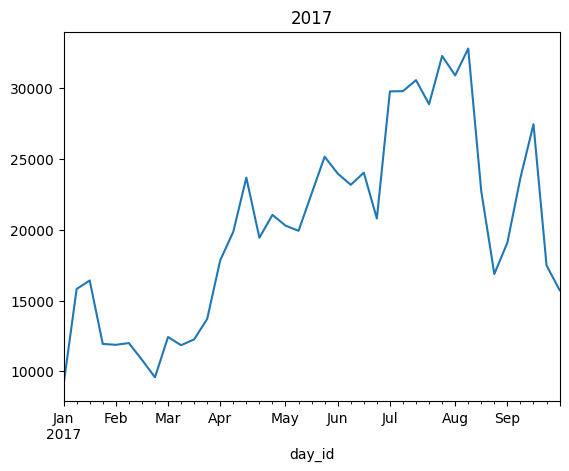

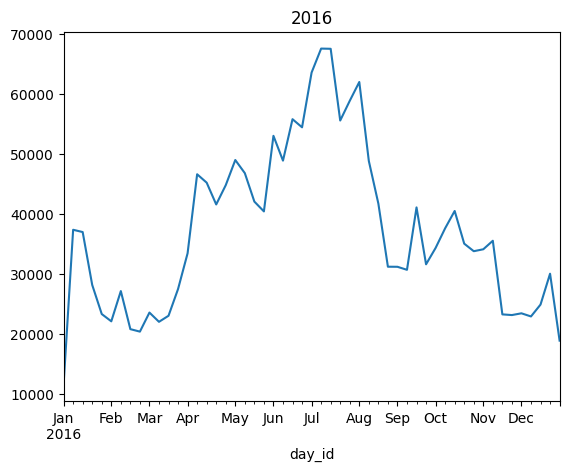

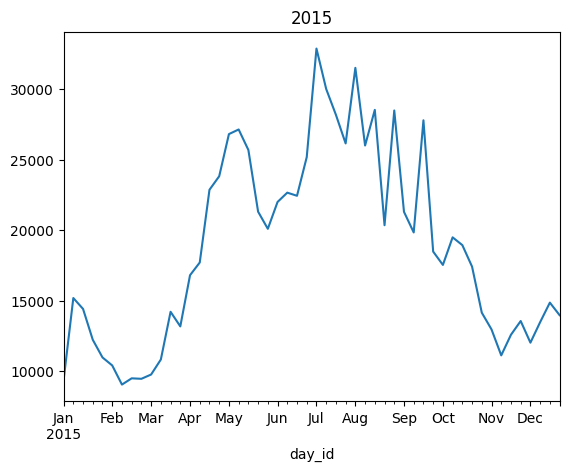

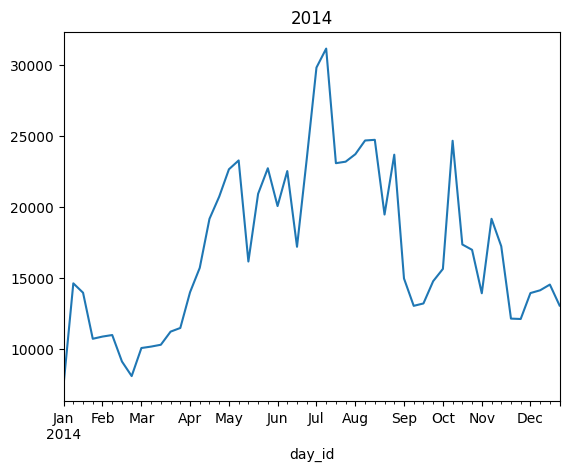

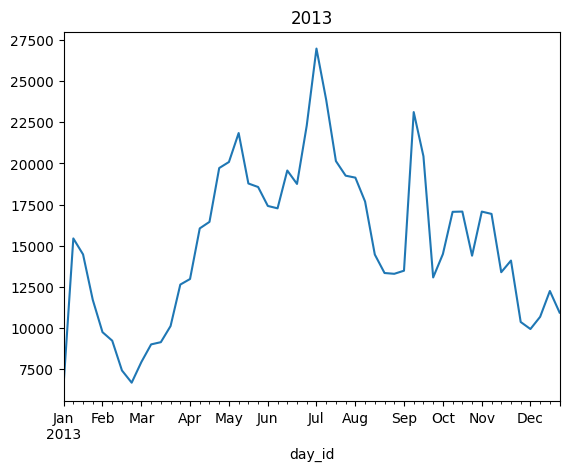

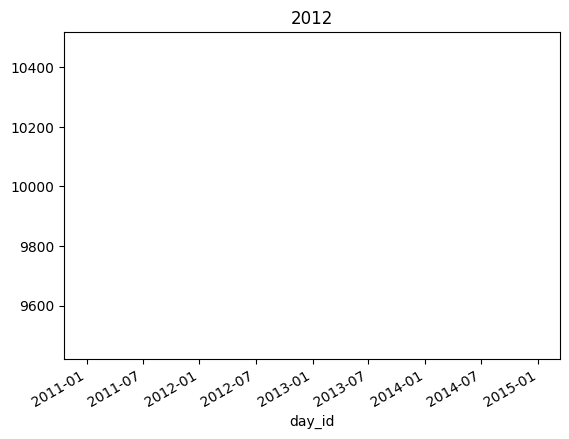

In [21]:
def plot_turnover_by_year(df):
    for year in df['year'].unique():
        df_year = df[df['year'] == year]
        df_year.groupby('day_id')['turnover'].sum().plot(kind='line', x='day_id', y='turnover')
        plt.title(year)
        plt.show()

plot_turnover_by_year(df_73)

In [22]:
df_73['day_of_week'] = df_73['day_id'].dt.dayofweek

/var/folders/kd/wfb_h4cs1plf9qj53qbq0g6w0000gn/T/ipykernel_18376/687003157.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_73['day_of_week'] = df_73['day_id'].dt.dayofweek


<Axes: xlabel='day_of_week'>

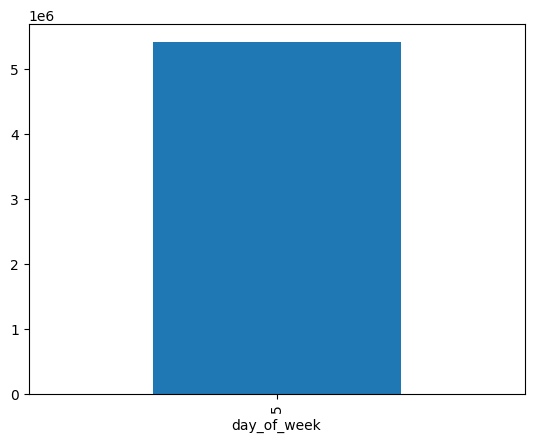

In [23]:
df_73.groupby('day_of_week')['turnover'].sum().plot(kind='bar')

In [24]:
df_73.day_id.unique()

<DatetimeArray>
['2017-09-30 00:00:00', '2017-09-23 00:00:00', '2017-09-16 00:00:00',
 '2017-09-09 00:00:00', '2017-09-02 00:00:00', '2017-08-26 00:00:00',
 '2017-08-19 00:00:00', '2017-08-12 00:00:00', '2017-08-05 00:00:00',
 '2017-07-29 00:00:00',
 ...
 '2013-03-02 00:00:00', '2013-02-23 00:00:00', '2013-02-16 00:00:00',
 '2013-02-09 00:00:00', '2013-02-02 00:00:00', '2013-01-26 00:00:00',
 '2013-01-19 00:00:00', '2013-01-12 00:00:00', '2013-01-05 00:00:00',
 '2012-12-29 00:00:00']
Length: 249, dtype: datetime64[ns]

In [25]:
df_train['day_of_week'] = df_train['day_id'].dt.dayofweek

In [26]:
df_train['day_of_week'].value_counts()

day_of_week
5    277719
Name: count, dtype: int64

Il semble que l'on ai que des données de vente sur les samedi, j'ai cru qu'il s'agissait d'une piste pour deviner le sport en question mais c'est une impasse. Il s'agit surement du jour où les données de vente de la semaine sont remontées/loggées.

On observe que l'année 2016 est environ 2x meilleur que les autres. Il s'agit d'une année olympique et d'euro de football ce qui pourrait m'orienter dans cette direction.

<Axes: xlabel='month'>

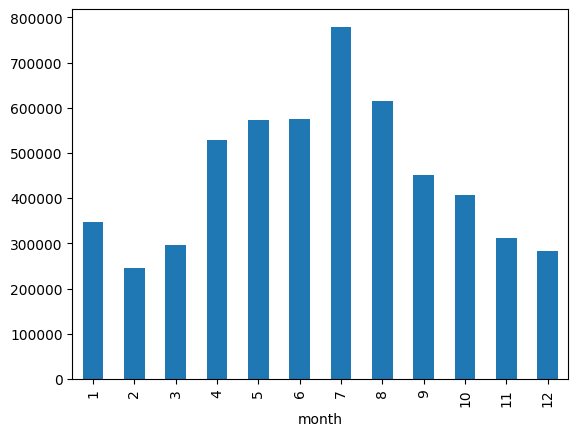

In [27]:
df_73.groupby(['month'])['turnover'].sum().plot(kind='bar')

<Axes: xlabel='month'>

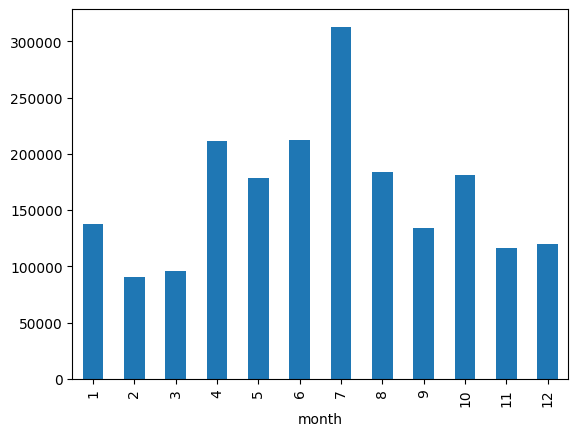

In [28]:
df_73[df_73['year']==2016].groupby(['month'])['turnover'].sum().plot(kind='bar')

<Axes: xlabel='dpt_num_department'>

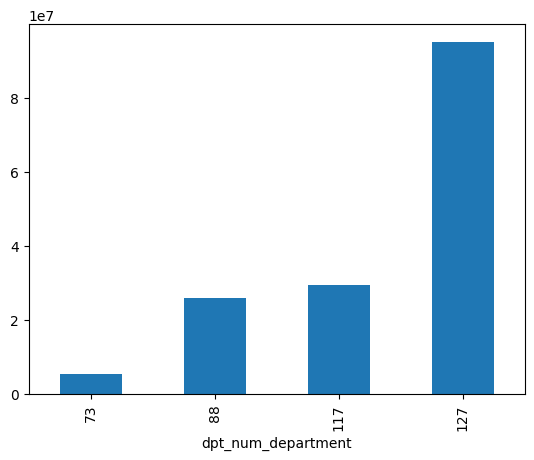

In [29]:
df_train.groupby('dpt_num_department')['turnover'].sum().plot(kind='bar')

Le fait que les ventes du département 77 soient les plus faibles parmis les 4 départements du dataset me font toutefois douter du fait qu'il puisse s'agir des ventes du football qui est tout de même le sport collectif majeur en France.

In [30]:

df_73[df_73['year']==2016].sort_values(by='turnover', ascending=False).iloc[:10]

,day_id,but_num_business_unit,dpt_num_department,turnover,year,month,day,day_of_week
59238,2016-11-05,899,73,3483.036642,2016,11,5,5
74563,2016-08-06,233,73,2571.894540,2016,8,6,5
78895,2016-07-16,32,73,2504.599306,2016,7,16,5
78598,2016-07-16,308,73,2489.111528,2016,7,16,5
74767,2016-08-06,308,73,2486.480572,2016,8,6,5
80895,2016-07-02,32,73,2242.946419,2016,7,2,5
80481,2016-07-02,118,73,2172.599071,2016,7,2,5
65207,2016-10-01,36,73,2129.829141,2016,10,1,5
74973,2016-08-06,338,73,2120.033761,2016,8,6,5
73553,2016-08-13,308,73,2104.827453,2016,8,13,5


In [31]:
df_73[df_73['year']==2016].groupby('day_id')['turnover'].sum().sort_values(ascending=False).iloc[:10]

day_id
2016-07-09    67502.454060
2016-07-16    67467.345035
2016-07-02    63514.480070
2016-08-06    61943.948946
2016-07-30    58808.949564
2016-06-18    55753.923283
2016-07-23    55531.622257
2016-06-25    54402.578585
2016-06-04    52985.781218
2016-05-07    48961.611321
Name: turnover, dtype: float64

En général, on observe une saisonnalité des ventes avec des pics qui semblent coïncider avec le nouvel an, le début du mois de Mai, les vacances d'été et la rentrée. Faute de meilleures idées, je pense à un sport olympique comme le judo ou l'athlétisme mais je n'ai pas trouvé d'explication qui me satisfasse complètement.

### e. Based on sales can you guess what kind of sport represents departement 117?

In [32]:
df_117 = df_train[df_train['dpt_num_department'] == 117]

<Axes: xlabel='day_id'>

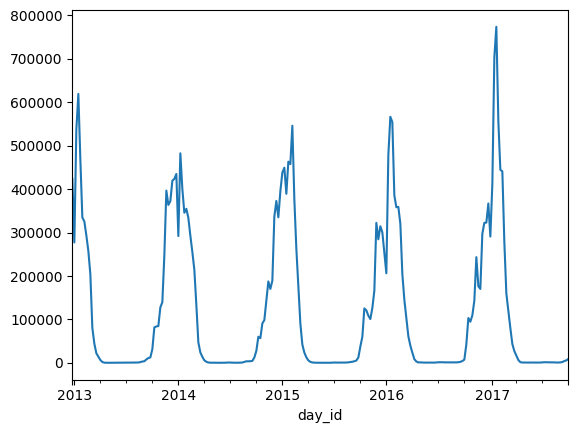

In [33]:
df_117.groupby('day_id')['turnover'].sum().plot(kind='line', x='day_id', y='turnover')

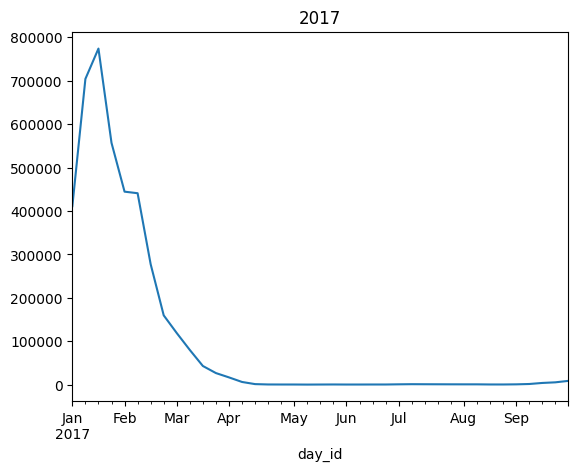

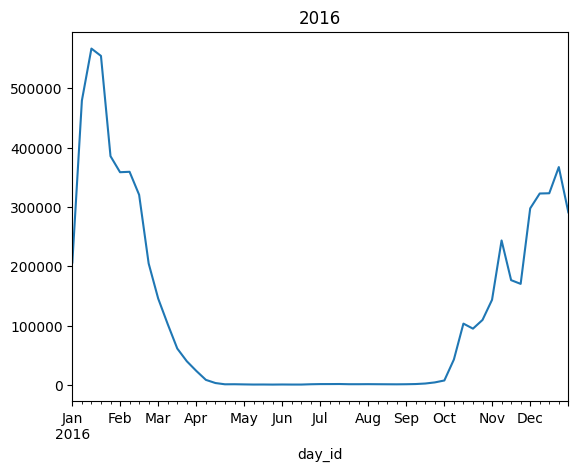

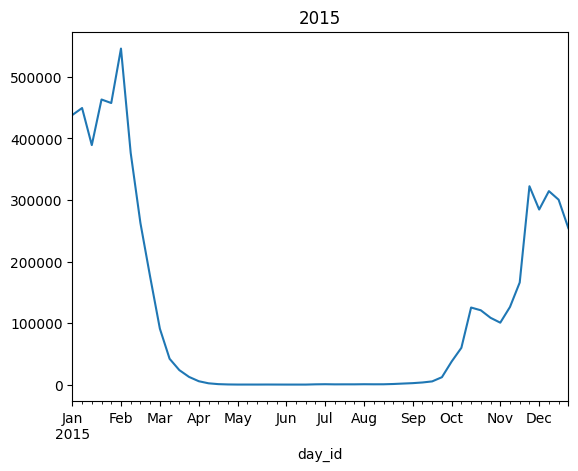

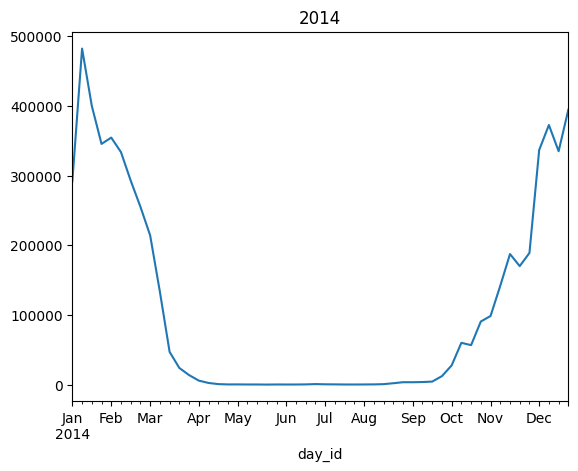

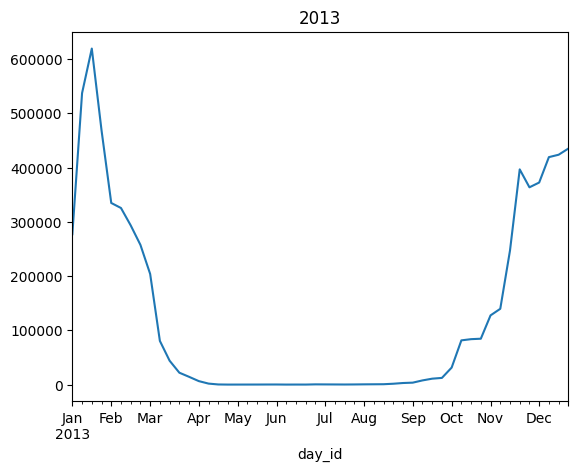

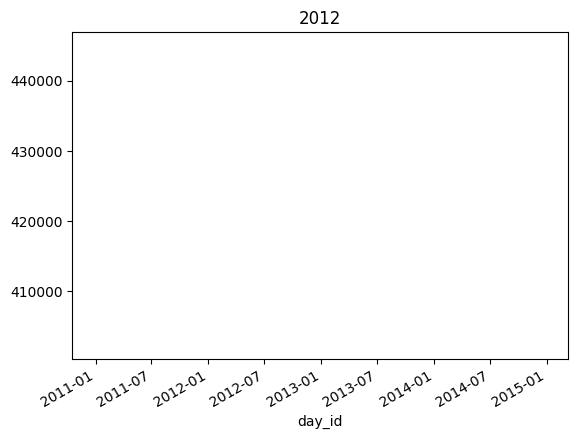

In [34]:
plot_turnover_by_year(df_117)

La saisonnalité est tellement forte qu'il s'agit très certainement du département en charge des sports d'hiver. La plupart des achats ayant lieu sur la période Novembre - Mars qui est correspond (en prenant en compte que les gens anticipent un peu leurs achats) à la pleine saison du ski et autres sports alpins.

### f. What other insights can you draw from the data? Provide plots and figures if needed.

In [35]:
df_merge = pd.merge(df_train, df_bu_feat, on='but_num_business_unit')

In [36]:
# get the departement by selecting the first 2 digits of the zip code
df_merge['departement_bu'] = df_merge['but_postcode'].astype(str).str[:2]


<Axes: xlabel='departement_bu'>

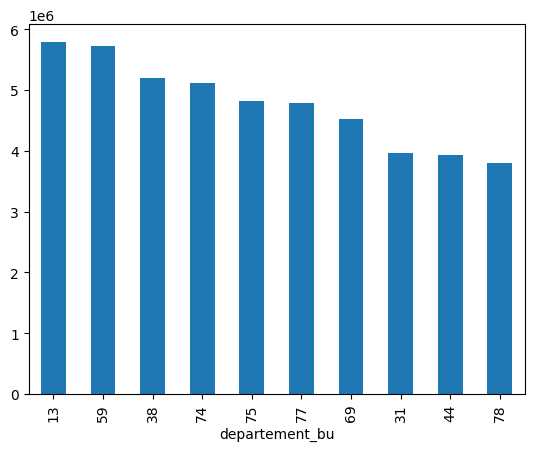

In [37]:
df_merge.groupby('departement_bu')['turnover'].sum().sort_values(ascending=False)[:10].plot(kind='bar')

Dans le top 10 des départements (au sens géographique) on retrouve les grandes métropoles française : Marseille en tête (le 13), Lille (59), Paris (75), Lyon (69), Toulouse (31) et Nantes (44).  
Mais on observe quelques surprises comme l'Isère (38) et la Haute-Savoie (74) qui ont des populations un peu plus faibles mais probablement bien plus passionnés par la montagne, la randonnée et les sports d'hiver ce qui doit fortement contribuer aux bons résultats que l'on observe.


In [38]:
df_merge.columns

Index(['day_id', 'but_num_business_unit', 'dpt_num_department', 'turnover',
       'year', 'month', 'day', 'day_of_week', 'but_postcode', 'but_latitude',
       'but_longitude', 'but_region_idr_region', 'zod_idr_zone_dgr',
       'departement_bu'],
      dtype='object')

In [39]:
df_turnover_store = df_merge.groupby(['but_num_business_unit','but_latitude','but_longitude']).agg({'turnover':'sum'}).reset_index()

In [40]:
import plotly.express as px

fig = px.scatter_mapbox(
    df_turnover_store, 
    lat="but_latitude", 
    lon="but_longitude",     
    size="turnover",
    zoom=4,
    )
fig.update_layout(mapbox_style="open-street-map")
fig.show()

<Axes: >

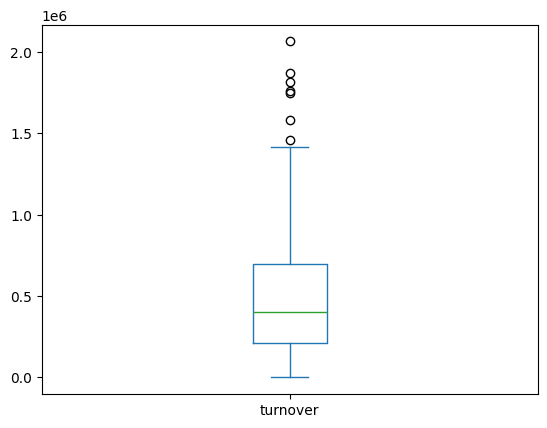

In [41]:
df_turnover_store.plot(kind='box', y='turnover')

In [42]:
Q1 = df_turnover_store['turnover'].quantile(0.25)
Q3 = df_turnover_store['turnover'].quantile(0.75)
IQR = Q3 - Q1
df_outliers = df_turnover_store[(df_turnover_store['turnover'] < (Q1 - 1.5 * IQR)) | (df_turnover_store['turnover'] > (Q3 + 1.5 * IQR))]

In [43]:
fig = px.scatter_mapbox(
    df_outliers, 
    lat="but_latitude", 
    lon="but_longitude",     
    size="turnover",
    zoom=4,
    )
fig.update_layout(mapbox_style="open-street-map")
fig.show()

In [44]:
fig = px.scatter_mapbox(
    df_turnover_store.sort_values(ascending=True, by='turnover')[:10], 
    lat="but_latitude", 
    lon="but_longitude",     
    size="turnover",
    zoom=4,
    )
fig.update_layout(mapbox_style="open-street-map")
fig.show()


In [45]:
df_turnover_store[df_turnover_store['turnover']<1000].sort_values(by='turnover', ascending=False)

,but_num_business_unit,but_latitude,but_longitude,turnover
319,1882,46.786704,-2.072529,835.048921
316,1875,43.111000,5.812300,449.756741
275,933,50.709900,3.173700,192.781495
211,425,50.617921,3.084186,147.867497
321,1887,51.050275,2.393182,123.269040
235,513,44.717366,-0.733429,52.833402
205,394,43.428178,5.396908,45.562430
207,396,48.623294,2.305949,19.771134
216,437,50.687900,3.103500,15.069154
198,357,45.654464,5.113279,11.886832


On observe des outliers assez important au niveau des `but_num_business_unit` avec certains stores qui sur-performe de manière assez importantes mais aussi une quinzaine de store qui ne dépassent pas les 1000 de turnover quand la moyenne et la médiane se situent entre 400000 et 500000.  
  
Il peut toutefois s'agir de nouveaux points de vente qui n'ont pas encore beaucoup d'historique.

In [46]:
df_train[df_train['turnover']<0]

,day_id,but_num_business_unit,dpt_num_department,turnover,year,month,day,day_of_week
291,2017-09-30,122,117,-0.032732,2017,9,30,5
363,2017-09-30,12,73,-5.181203,2017,9,30,5
469,2017-09-30,95,73,-2.700874,2017,9,30,5
645,2017-09-30,1115,117,-2.541980,2017,9,30,5
717,2017-09-30,454,73,-0.000318,2017,9,30,5
...,...,...,...,...,...,...,...,...
277374,2012-12-29,218,73,-0.220862,2012,12,29,5
277383,2012-12-29,76,73,-1.909901,2012,12,29,5
277413,2012-12-29,301,73,-1.000076,2012,12,29,5
277444,2012-12-29,546,73,-0.379756,2012,12,29,5


On peut trouver un certains nombre d'examples présentant des turnover négatifs ce qui est plutôt étrange.